# Simple Perceptron on AND-Gate

This notebook shows an implementation of a single perceptron with a sigmoid activation function and binary cross entropy as loss function.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function and gradient
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_gradient(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Binary cross-entropy loss and gradient
def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-15  
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def bce_gradient(y_true, y_pred):
    return (y_pred - y_true) / (y_pred * (1 - y_pred) + 1e-15)

# Perceptron
class Perceptron:
    def __init__(self, input_size, learning_rate=0.01):
        self.weights = np.zeros(input_size)
        self.bias = 0
        self.learning_rate = learning_rate
        self.loss_history = []

    # 1. Multipy input with weights 2. Add bias 3. Apply activation function 
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return sigmoid(linear_output)

    def train(self, X, y, epochs=1000):
        for epoch in range(epochs+1):
            # Forward pass
            y_pred = self.predict(X) 

            loss = binary_cross_entropy(y, y_pred)
            self.loss_history.append(loss)

            # Backpropagation with BCE derivative and sigmoid derivative
            d_loss = bce_gradient(y, y_pred) * sigmoid_gradient(y_pred) 

            # Gradient descent
            dW = np.dot(X.T, d_loss) / X.shape[0]
            dB = np.mean(d_loss)

            self.weights -= self.learning_rate * dW
            self.bias -= self.learning_rate * dB

            if epoch % 100 == 0 :
                print(f'Epoch {epoch}: Loss = {loss:.4f}')

In [8]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])  


perceptron = Perceptron(input_size=2, learning_rate=0.3)
perceptron.train(X, y, epochs=1000)

predicted_probs = perceptron.predict(X).flatten()
predicted_classes = (predicted_probs >= 0.5).astype(int)

print("Predicted Probabilities:", predicted_probs)
print("Predicted Classes:", predicted_classes)
print("True Labels:", y.flatten())

Epoch 0: Loss = 0.6931
Epoch 100: Loss = 0.2797
Epoch 200: Loss = 0.1876
Epoch 300: Loss = 0.1590
Epoch 400: Loss = 0.1503
Epoch 500: Loss = 0.1478
Epoch 600: Loss = 0.1471
Epoch 700: Loss = 0.1469
Epoch 800: Loss = 0.1468
Epoch 900: Loss = 0.1468
Epoch 1000: Loss = 0.1468
Predicted Probabilities: [5.68340700e-12 2.66744286e-06 2.66744286e-06 5.55938602e-01]
Predicted Classes: [0 0 0 1]
True Labels: [0 0 0 1]


After training and prediction we plot the decision boundary with the black line representing the threshold for decision.

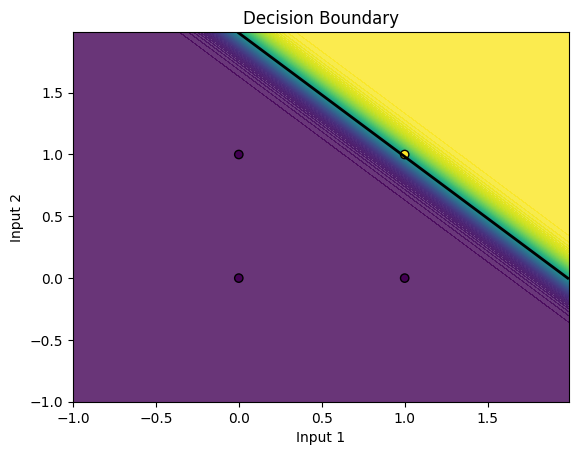

In [ ]:
def plot_decision_boundary(model, X, y,threshold=0.5):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, levels=np.linspace(0, 1, 100), alpha=0.8)
    plt.contour(xx, yy, Z, levels=[threshold], colors='black', linewidths=2)

    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.title('Decision Boundary')

    plt.show()

plot_decision_boundary(perceptron, X, y)

To see how the loss evolves throughout the epochs we also plot the loss function over epochs.

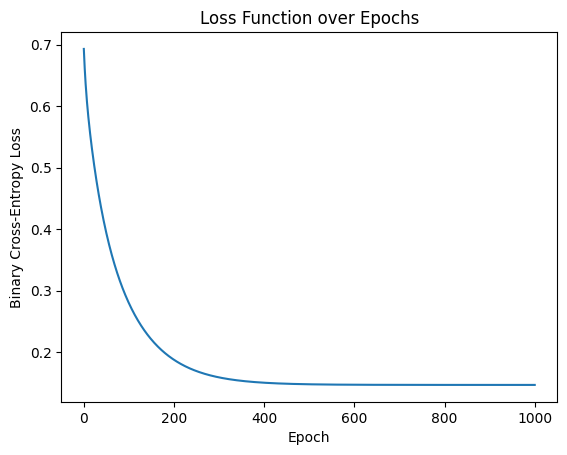

In [5]:
def plot_loss(loss_history):
    plt.plot(loss_history)
    plt.title("Loss Function over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Binary Cross-Entropy Loss")
    plt.show()

plot_loss(perceptron.loss_history)

Now we try to train our perceptron on the XOR-Gate

In [10]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

perceptron = Perceptron(input_size=2, learning_rate=0.3)
perceptron.train(X, y, epochs=1000)

predicted_probs = perceptron.predict(X).flatten()
predicted_classes = (predicted_probs >= 0.5).astype(int)

print("Predicted Probabilities:", predicted_probs)
print("Predicted Classes:", predicted_classes)
print("True Labels:", y.flatten())

Epoch 0: Loss = 0.6931
Epoch 100: Loss = 0.6931
Epoch 200: Loss = 0.6931
Epoch 300: Loss = 0.6931
Epoch 400: Loss = 0.6931
Epoch 500: Loss = 0.6931
Epoch 600: Loss = 0.6931
Epoch 700: Loss = 0.6931
Epoch 800: Loss = 0.6931
Epoch 900: Loss = 0.6931
Epoch 1000: Loss = 0.6931
Predicted Probabilities: [0.5 0.5 0.5 0.5]
Predicted Classes: [1 1 1 1]
True Labels: [0 1 1 0]


We see that our single perceptron cannot predict the XOR gate correctly. This is because a single perceptron can only solve linearly separable problems and the XOR gate is not linearly separable.